In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Crying Songs .csv")

In [ ]:
a=df.head(10)

In [ ]:
df.tail()

,#,Song,Artist,Genres,Parent Genres,Album,Album Date,Added At,Album Label
363,364,Sad,Maroon 5,pop,Pop,Overexposed Track By Track,01-01-2012,14-06-2022,Interscope Records*
364,365,Please Never Fall in Love Again,Ollie MN,indie pop,Rock,Songs from the Swamp,24-09-2017,14-06-2022,667470 Records DK
365,366,State Lines,Novo Amor,"ambient folk, indie folk, pop","Folk/Acoustic, Pop",Birthplace,19-10-2018,14-06-2022,AllPoints
366,367,You're Somebody Else,flora cash,"indie pop, scandipop, swedish indie folk","Rock, Dance/Electronic, Folk/Acoustic","Baby, It's Okay",06-03-2020,14-06-2022,Bee & El/RCA Records
367,368,Favourite Ex,Maisie Peters,"alt z, indie pop, pop, uk pop","Rock, Pop",Favourite Ex,12-04-2019,14-06-2022,Atlantic Records UK


In [ ]:
df.isnull()

,#,Song,Artist,Genres,Parent Genres,Album,Album Date,Added At,Album Label
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
363,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False
365,False,False,False,False,False,False,False,False,False
366,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

#                 0
Song              0
Artist            0
Genres            9
Parent Genres    10
Album             0
Album Date        0
Added At          0
Album Label       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

#                0
Song             0
Artist           0
Genres           0
Parent Genres    0
Album            0
Album Date       0
Added At         0
Album Label      0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
363    False
364    False
365    False
366    False
367    False
Length: 358, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt

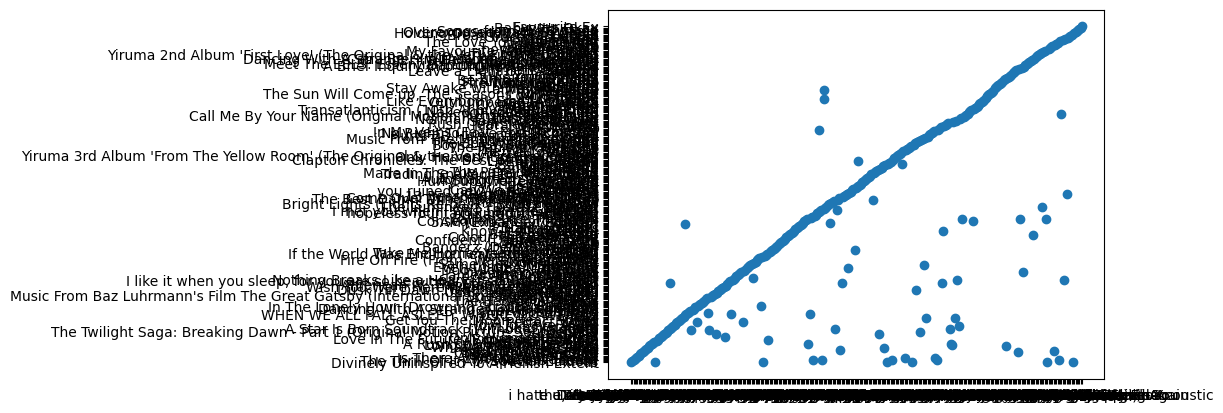

In [ ]:
plt.scatter(df["Song"],df["Album"])

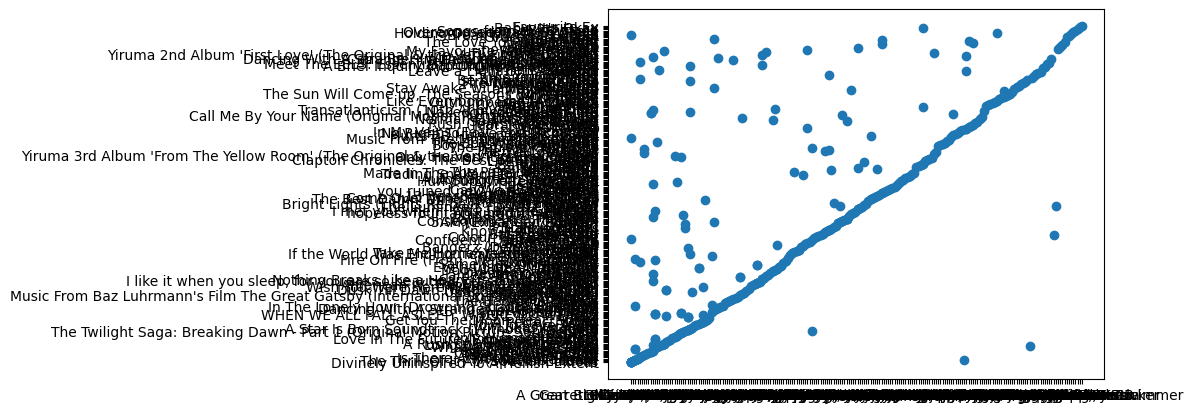

In [ ]:
plt.scatter(df["Artist"],df["Album"])

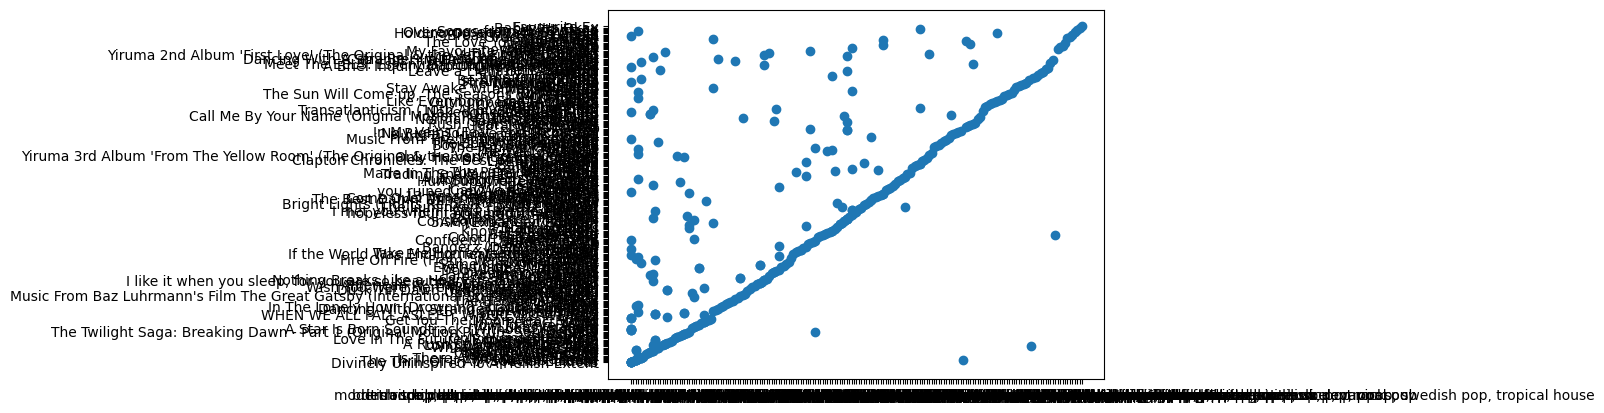

In [ ]:
plt.scatter(df["Genres"],df["Album"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Song"]=encoder.fit_transform(df["Song"])
df["Artist"]=encoder.fit_transform(df["Artist"])
df["Genres"]=encoder.fit_transform(df["Genres"])
df["Parent Genres"]=encoder.fit_transform(df["Parent Genres"])
df["Album"]=encoder.fit_transform(df["Album"])
df["Album Label"]=encoder.fit_transform(df["Album Label"])
df["Album Date"]=encoder.fit_transform(df["Album Date"])
df["Added At"]=encoder.fit_transform(df["Added At"])

In [ ]:
df.head()

,#,Song,Artist,Genres,Parent Genres,Album,Album Date,Added At,Album Label
0,1,248,115,179,21,67,142,0,144
1,2,334,70,174,26,286,212,0,5
2,3,281,170,101,21,236,21,0,31
3,4,327,148,171,21,273,67,0,100
4,5,24,49,59,21,9,193,0,138


In [ ]:
df.value_counts("Song")

Song
36     3
237    2
17     2
249    2
101    2
      ..
118    1
117    1
116    1
115    1
351    1
Name: count, Length: 352, dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='Parent Genres', ylabel='count'>

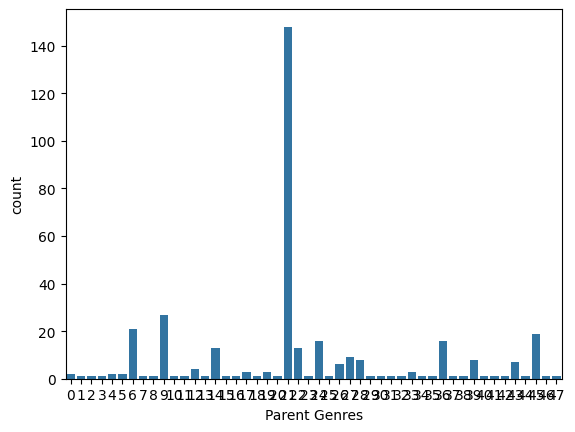

In [ ]:
sns.countplot(x=df["Parent Genres"])

<Axes: xlabel='Genres'>

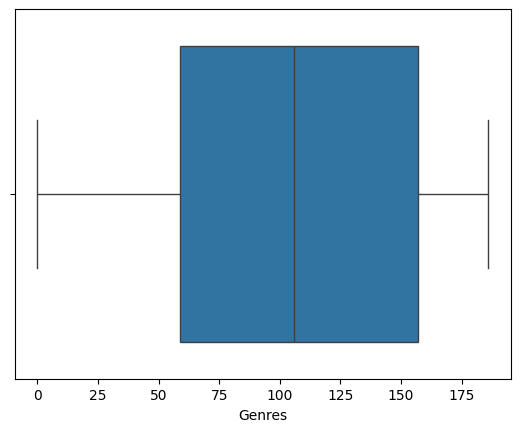

In [ ]:
sns.boxplot(x=df["Genres"],data=df)

Text(0.5, 1.0, 'ALBUM PREDICTION')

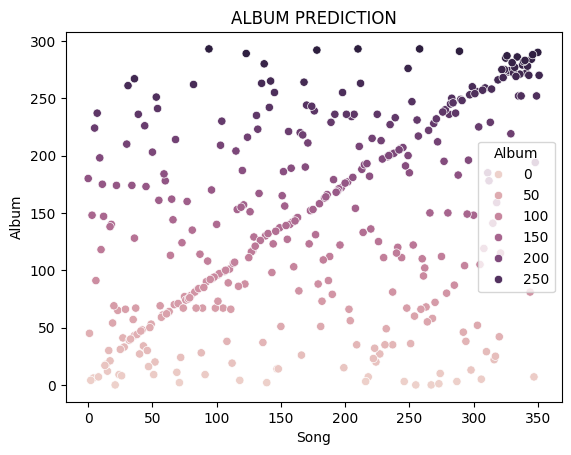

In [ ]:
sns.scatterplot(x=df["Song"],y=df["Album"],hue="Album",data=df)
plt.title("ALBUM PREDICTION")

In [ ]:
X=df.drop(columns=["Album"],axis=1)
Y=df["Album"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
df.shape

(358, 9)

In [ ]:
X_train.shape

(286, 8)

In [ ]:
X_test.shape

(72, 8)

In [ ]:
Y_train.shape

(286,)

In [ ]:
Y_test.shape

(72,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
model.predict(X_test)

array([278,  64,  35,   9, 126,  21, 107,   2, 230,  67,   7, 275, 229,
       143, 145, 161, 209,  70, 172,  83, 110, 207,  77, 267, 152,  30,
        81,  71,   3, 116,  66, 254,  63, 147,  51,  65,  35, 155, 139,
       207, 121,  57, 207,   7,   0, 292,  67, 168, 117,  27, 155,  80,
       112, 174, 272, 148, 169, 236, 174,  43,   3,  78, 275,  20, 153,
       236, 115, 266, 255,  14,  20, 150])

In [ ]:
Y_test

6      290
266    170
113    171
222      9
97      68
      ... 
180    291
304    255
205     14
70     215
131    150
Name: Album, Length: 72, dtype: int64

In [ ]:
model.score(X_test,Y_test)*100

19.444444444444446

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
model2.predict(X_test)

array([278, 217,  79, 216, 153,  65, 102,   2,  12,  67,   7, 105, 229,
       143, 139, 243, 209,  70, 220, 227,  25, 157, 285,  54, 216,  30,
        81,  74, 205, 230,  56, 195,  78,  12, 178, 100, 157, 251, 117,
       237, 173,  57,  73,   7, 137, 292,  67, 108, 117,  71,  90,  80,
       172, 179, 272, 148, 169, 236, 174,   4,  96,  78, 275, 131, 153,
       236, 115,  80, 223, 179,  20,  13])

In [ ]:
Y_test

6      290
266    170
113    171
222      9
97      68
      ... 
180    291
304    255
205     14
70     215
131    150
Name: Album, Length: 72, dtype: int64

In [1]:
model2.score(X_test,Y_test)*100

NameError: name 'model2' is not defined